<center>
<h1>K-Means con datos de lluvias de Australia</h1><br>

<img src="http://becasparatodos.com/wp-content/uploads/2016/12/tec-de-monterrey-becas-para-mexicanos.jpg" width="30%"><br>
    <center>
A01705420 - Alfonso Antonio Zazueta Bustillos<br>
A01706155 - Manolo Ramírez Pintor<br>
A01701969 - Enrique Guamán Herrera<br>
    </center>

<h2>Librerías:</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

<h2>Cargar datos a memoria:</h2>
<p>De esta manera los accesamos fácilmente llamando al mismo tiempo a Pandas

In [2]:
# Carga de datos
lluvias_sydney = pd.read_csv("weatherAUS_sydney.csv")

<h2>Revisar información de los datos:</h2>
<p>Hacer una review de que todo ande bien en cuanto a valores y datos para que no falle.

In [3]:
lluvias_sydney.columns

Index(['LaFech', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday'],
      dtype='object')

In [4]:
lluvias_sydney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LaFech         366 non-null    int64  
 1   MinTemp        366 non-null    float64
 2   MaxTemp        366 non-null    float64
 3   Rainfall       366 non-null    float64
 4   Evaporation    366 non-null    float64
 5   Sunshine       366 non-null    float64
 6   WindGustSpeed  366 non-null    int64  
 7   WindSpeed9am   366 non-null    int64  
 8   WindSpeed3pm   366 non-null    int64  
 9   Humidity9am    366 non-null    int64  
 10  Humidity3pm    366 non-null    int64  
 11  Pressure9am    366 non-null    float64
 12  Pressure3pm    366 non-null    float64
 13  Cloud9am       366 non-null    int64  
 14  Cloud3pm       366 non-null    int64  
 15  Temp9am        366 non-null    float64
 16  Temp3pm        366 non-null    float64
 17  RainToday      366 non-null    int64  
dtypes: float64

<h2>Comenzar a definir variables:</h2>
<p>Ponemos un array para crear la variable clustering con el número de variables-1 y un random state de 5, luego utilizamos la función <strong>.fix(var)</strong>

In [5]:
X = lluvias_sydney.to_numpy()
clustering = KMeans(n_clusters=16, random_state = 5)
clustering.fit(X)

KMeans(n_clusters=16, random_state=5)

<h2>Crear el gráfico:</h2>
<p>Mediante numpy, creamos un array con los colores a utilizar en el gráfico, después definimos una nueva variable tipo DataFrame que obtenga los datos que ya tenemos, a continuación, definimos las columnas que tenemos disponibles y comenzamos a crear el gráfico con las funciones <strong>.subplot(n,n,n)</strong> y <strong>.scatter(x, y, c, ...)</strong>. Para finalizar, ahora ponemos un título y ya está.
    
<p>Update: Por alguna razón no pude poner el color pero veo que se ponen unos de forma automática.
<p>Update 2: Resté 890 en Pressure para que se viera mejor el gráfico.

Text(0.5, 1.0, 'Año entero vs factores de lluvia')

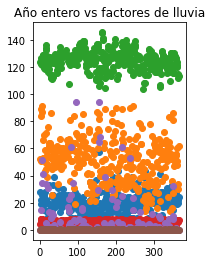

In [6]:
color_theme = np.array(['darkgray', 'lightsalmon','powderblue'])
sydney_df = pd.DataFrame(lluvias_sydney)
sydney_df.columns=['LaFech', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm', 'RainToday']

plt.subplot (1,2,2)
plt.scatter(sydney_df['LaFech'], sydney_df['WindSpeed3pm'])
plt.scatter(sydney_df['LaFech'], sydney_df['Humidity3pm'])
plt.scatter(sydney_df['LaFech'], sydney_df['Pressure3pm']-890) #Reducción para mejor visualización
plt.scatter(sydney_df['LaFech'], sydney_df['Cloud3pm'])
plt.scatter(sydney_df['LaFech'], sydney_df['Rainfall'])
plt.scatter(sydney_df['LaFech'], sydney_df['RainToday'])
plt.title ("Año entero vs factores de lluvia")

<h2>Evaluar resultados:</h2>
<p>Desafortunadamente no supe cómo realizar esta parte pero estuve intentando varias cosas para hacerlo funcionar, metí datos y me sacó listas interminables con advertencias, mejor lo dejé sin funcionar. 😟

In [7]:
# relabel = np.choose (clustering.labels_,[2,0,1]).astype(np.int64)
# print (classification_report(y, relabel))

<h2> - Pruebas -</h2>
<p>Experimentos con las primeras variables recibidas (contiene errores)

In [8]:
iris=datasets.load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
X

array([[  1. ,  17.9,  25.6, ...,  22.9,  24.2,   0. ],
       [  2. ,  18. ,  25.4, ...,  22.3,  23.5,   0. ],
       [  3. ,  20.2,  24.6, ...,  22.2,  19.9,   0. ],
       ...,
       [364. ,  22.6,  36.6, ...,  28.1,  31.8,   0. ],
       [365. ,  23.9,  33.3, ...,  27.3,  32.1,   0. ],
       [366. ,  24.1,  30. , ...,  27.7,  26.4,   0. ]])

In [11]:
# lluvias_sydney.data()

In [12]:
sydney_df['LaFech']

0        1
1        2
2        3
3        4
4        5
      ... 
361    362
362    363
363    364
364    365
365    366
Name: LaFech, Length: 366, dtype: int64

In [13]:
sydney_df['RainToday']

0      0
1      0
2      0
3      1
4      1
      ..
361    0
362    0
363    0
364    0
365    0
Name: RainToday, Length: 366, dtype: int64